In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df= pd.read_csv(url)
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,nan,0.000,nan,nan,0.000,nan,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
1,AFG,Asia,Afghanistan,01/01/20,nan,0.000,nan,nan,0.000,nan,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
2,AFG,Asia,Afghanistan,02/01/20,nan,0.000,nan,nan,0.000,nan,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
3,AFG,Asia,Afghanistan,03/01/20,nan,0.000,nan,nan,0.000,nan,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
4,AFG,Asia,Afghanistan,04/01/20,nan,0.000,nan,nan,0.000,nan,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
5,AFG,Asia,Afghanistan,05/01/20,nan,0.000,nan,nan,0.000,nan,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
6,AFG,Asia,Afghanistan,06/01/20,nan,0.000,0.000,nan,0.000,0.000,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
7,AFG,Asia,Afghanistan,07/01/20,nan,0.000,0.000,nan,0.000,0.000,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
8,AFG,Asia,Afghanistan,08/01/20,nan,0.000,0.000,nan,0.000,0.000,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498
9,AFG,Asia,Afghanistan,09/01/20,nan,0.000,0.000,nan,0.000,0.000,...,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498


In [2]:
df_copy=df.copy()

# 2. High Level Data Understanding:
a. Find no. of rows & columns in the dataset
 b. Data types of columns.
 c. Info & describe of data in dataframe.


In [3]:
print("Number of Rows are : ",df.shape[0])
print("Number of Columns are : ",df.shape[1])

Number of Rows are :  57394
Number of Columns are :  49


In [4]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,53758.000,56465.000,55652.000,44368.000,56465.000,55652.000,53471.000,56401.000,55587.000,44096.000,...,50367.000,33571.000,51013.000,52881.000,39669.000,39156.000,24176.000,45936.000,56336.000,49247.000
mean,167797.369,1953.577,1920.432,6858.639,47.054,46.835,3139.100,39.345,38.403,95.335,...,20620.172,12.435,252.647,8.070,10.742,32.643,52.090,3.090,73.938,0.722
std,1693037.546,18269.650,17777.392,55780.813,390.854,378.273,6183.455,133.985,101.649,180.722,...,20311.000,19.428,117.522,4.190,10.471,13.454,31.645,2.513,7.397,0.153
min,1.000,-8261.000,-552.000,1.000,-1918.000,-232.143,0.001,-2212.545,-269.978,0.000,...,661.240,0.100,79.370,0.990,0.100,7.700,1.188,0.100,53.280,0.354
25%,180.000,0.000,0.857,13.000,0.000,0.000,90.033,0.000,0.260,3.978,...,5321.444,0.500,156.139,5.310,1.900,21.400,21.222,1.300,69.870,0.601
50%,2070.000,14.000,19.429,84.000,0.000,0.286,593.663,2.194,3.863,20.383,...,13913.839,2.000,238.339,7.110,6.400,31.400,52.232,2.500,75.345,0.752
75%,22356.750,235.000,245.286,727.000,4.000,4.000,3487.050,25.941,29.678,90.571,...,31400.840,18.100,318.991,10.390,19.600,40.900,83.741,4.200,79.380,0.847
max,55154651.000,646281.000,584981.857,1328537.000,10600.000,9027.714,76541.772,8652.658,2472.188,1248.014,...,116935.600,77.600,724.417,30.530,44.000,78.100,98.999,13.800,86.750,0.953


# 3. Low Level Data Understanding :

### a. Find count of unique values in location column.

In [7]:
df["location"].value_counts().sort_index()

Afghanistan       323
Albania           254
Algeria           323
Andorra           255
Angola            241
                 ... 
Western Sahara    206
World             323
Yemen             222
Zambia            244
Zimbabwe          242
Name: location, Length: 216, dtype: int64

### b. Find which continent has maximum frequency using values counts.

In [8]:
df["continent"].value_counts().head(1)

Europe    14828
Name: continent, dtype: int64

### c. Find maximum & mean value in 'total_cases'.

In [9]:
print("Mean value for total_cases : ","%.1f"%df["total_cases"].mean())
print("Max value for total_cases : ",df["total_cases"].max())

Mean value for total_cases :  167797.4
Max value for total_cases :  55154651.0


### d. Find 25%,50% & 75% quartile value in 'total_deaths'.

In [10]:
Q1=df["total_deaths"].quantile(0.25)
Q2=df["total_deaths"].quantile(0.5)
Q3=df["total_deaths"].quantile(0.75)
print("25% quartile value is :",Q1)
print("50% quartile value is :",Q2)
print("75% quartile value is :",Q3)

25% quartile value is : 13.0
50% quartile value is : 84.0
75% quartile value is : 727.0


### e. Find which continent has maximum 'human_development_index'

In [11]:
df.groupby(["continent"]).agg({"human_development_index":"count"}).sort_values(by=["human_development_index"],ascending=False).head(1)

,human_development_index
continent,
Asia,13205


### f. Find which continent has minimum 'gdp_per_capita'.

In [12]:
df.groupby(["continent"]).agg({"gdp_per_capita":"max"}).sort_values(by=["gdp_per_capita"],ascending=False).head(1)

,gdp_per_capita
continent,
Asia,116935.600


# 4. Filter the dataframe with only this columns
['continent','location','date','total_cases','total_deaths','gdp_per_ca
pita','
human_development_index'] and update the data frame.

In [13]:
df=df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,nan,nan,1803.987,0.498
1,Asia,Afghanistan,01/01/20,nan,nan,1803.987,0.498
2,Asia,Afghanistan,02/01/20,nan,nan,1803.987,0.498
3,Asia,Afghanistan,03/01/20,nan,nan,1803.987,0.498
4,Asia,Afghanistan,04/01/20,nan,nan,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.000,7.000,nan,nan
57390,NaN,International,14/11/20,696.000,7.000,nan,nan
57391,NaN,International,15/11/20,696.000,7.000,nan,nan
57392,NaN,International,16/11/20,696.000,7.000,nan,nan


# 5. Data Cleaning


### a. Remove all duplicates observations

In [14]:
df[df.duplicated()]
# no duplicate to drop

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index


### b. Find missing values in all columns 

In [15]:
df.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

### c. Remove all observations where continent column value is missing

In [16]:
df=df.dropna(subset=["continent"])
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,nan,nan,1803.987,0.498
1,Asia,Afghanistan,01/01/20,nan,nan,1803.987,0.498
2,Asia,Afghanistan,02/01/20,nan,nan,1803.987,0.498
3,Asia,Afghanistan,03/01/20,nan,nan,1803.987,0.498
4,Asia,Afghanistan,04/01/20,nan,nan,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.000,255.000,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.000,257.000,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.000,257.000,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.000,257.000,1899.775,0.535


### d. Fill all missing values with 0

In [17]:
df=df.fillna(0)
df.isna().sum()

continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
dtype: int64

# 6. Date time format :


### a. Convert date column in datetime format using pandas.to_datetime

In [18]:
df["date"]=pd.to_datetime(df["date"])
df.dtypes

continent                          object
location                           object
date                       datetime64[ns]
total_cases                       float64
total_deaths                      float64
gdp_per_capita                    float64
human_development_index           float64
dtype: object

### b. Create new column month after extracting month data from date column.

In [19]:
df["month"]=df["date"].dt.month
df.head(10)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.000,0.000,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.000,0.000,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.000,0.000,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.000,0.000,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.000,0.000,1803.987,0.498,4
5,Asia,Afghanistan,2020-05-01,0.000,0.000,1803.987,0.498,5
6,Asia,Afghanistan,2020-06-01,0.000,0.000,1803.987,0.498,6
7,Asia,Afghanistan,2020-07-01,0.000,0.000,1803.987,0.498,7
8,Asia,Afghanistan,2020-08-01,0.000,0.000,1803.987,0.498,8
9,Asia,Afghanistan,2020-09-01,0.000,0.000,1803.987,0.498,9


# 7. Data Aggregation:

### a. Find max value in all columns using groupby function on 'continent' column Tip: use reset_index() after applying groupby

In [20]:
df_groupby=df.groupby(["continent"]).agg(['max']).reset_index()

### b. Store the result in a new dataframe named 'df_groupby'. (Use df_groupby dataframe for all further analysis)

In [21]:
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
,,max,max,max,max,max,max,max
0,Africa,Zimbabwe,2020-12-11,752269.000,20314.000,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.000,130519.000,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.000,52147.000,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.000,247220.000,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.000,907.000,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.000,166014.000,22767.037,0.843,12


# 8. Feature Engineering :

In [22]:
df_groupby["total_deaths_to_total_cases"]=(df_groupby["total_deaths"].values/df_groupby["total_cases"]).values*100
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
,,max,max,max,max,max,max,max,
0,Africa,Zimbabwe,2020-12-11,752269.000,20314.000,26382.287,0.797,12,2.700
1,Asia,Yemen,2020-12-11,8874290.000,130519.000,116935.600,0.933,12,1.471
2,Europe,Vatican,2020-12-11,1991233.000,52147.000,94277.965,0.953,12,2.619
3,North America,United States Virgin Islands,2020-12-11,11205486.000,247220.000,54225.446,0.926,12,2.206
4,Oceania,Wallis and Futuna,2020-12-11,27750.000,907.000,44648.710,0.939,12,3.268
5,South America,Venezuela,2020-12-11,5876464.000,166014.000,22767.037,0.843,12,2.825


# 9. Data Visualization :

### a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

In [23]:
df_groupby.columns = df_groupby.columns.droplevel(1)

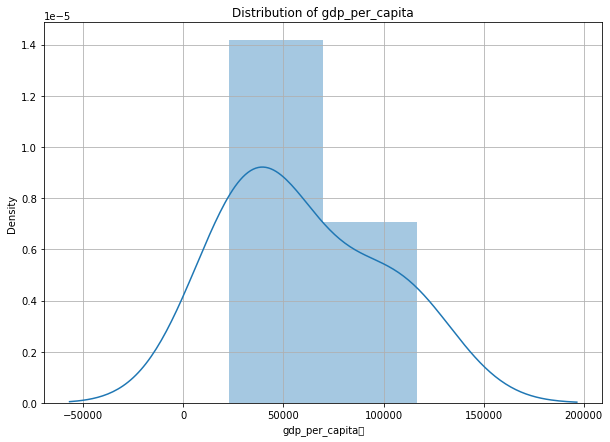

In [24]:
plt.figure(figsize=(10,7))
sns.distplot(df_groupby["gdp_per_capita"])
plt.xlabel("gdp_per_capita	")
plt.title("Distribution of gdp_per_capita")
plt.grid()

### b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

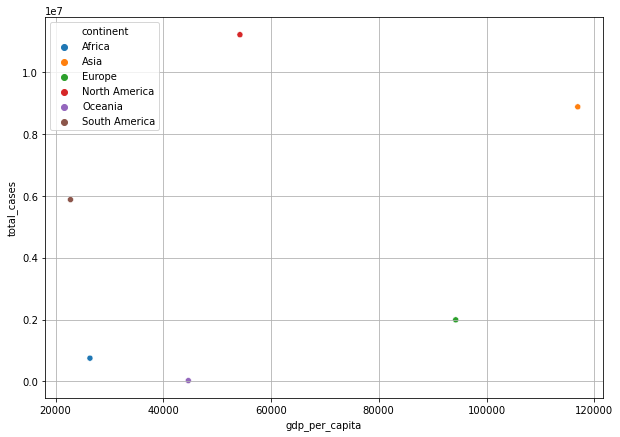

In [35]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_groupby, x="gdp_per_capita", y="total_cases", hue="continent")
plt.grid()

### c. Plot Pairplot on df_groupby dataset

<Figure size 720x504 with 0 Axes>

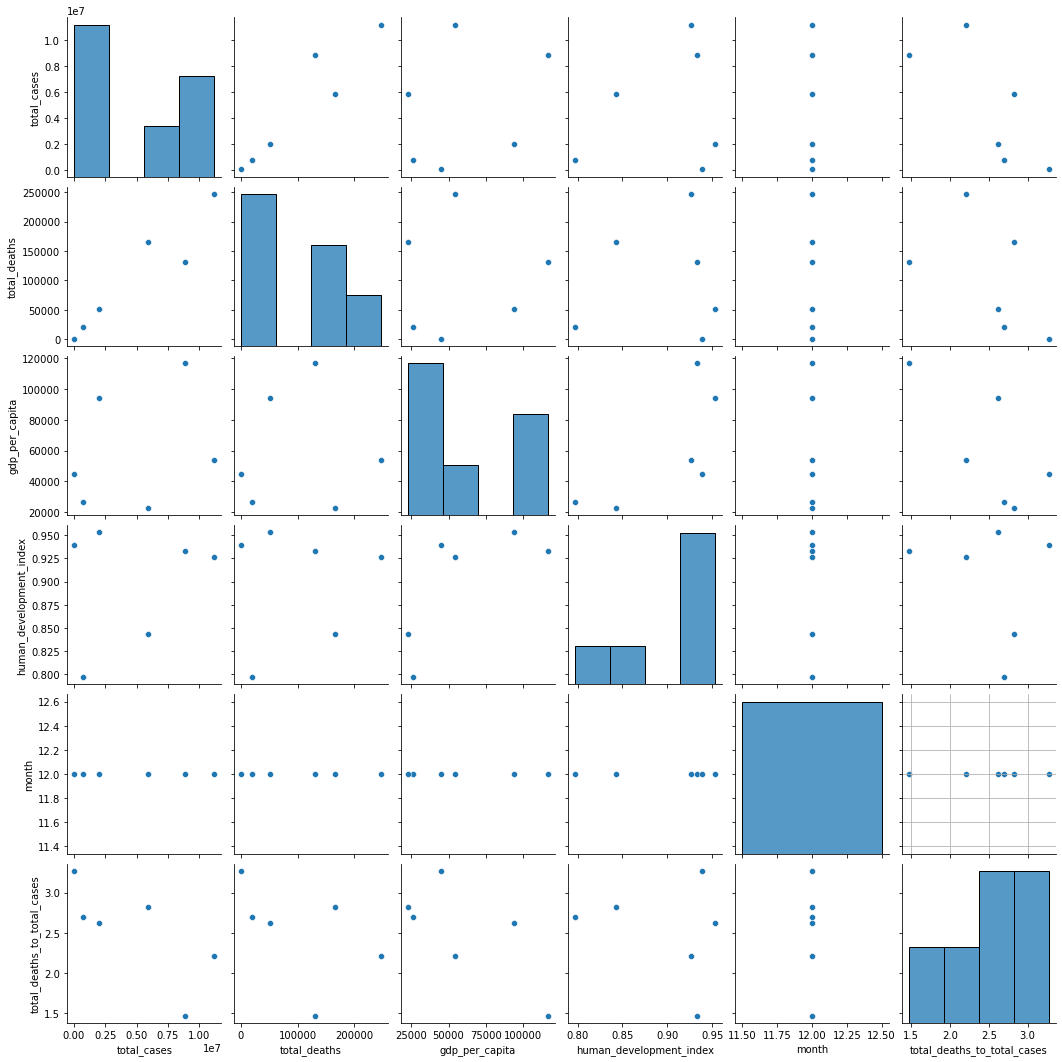

In [36]:
plt.figure(figsize=(10,7))
sns.pairplot(data=df_groupby)
plt.grid()

### d. Plot a bar plot of 'continent' column with 'total_cases'

<Figure size 720x504 with 0 Axes>

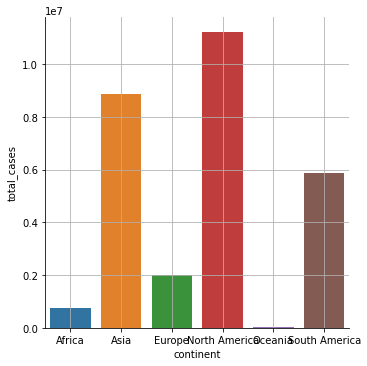

In [39]:
plt.figure(figsize=(10,7))
sns.catplot(data=df_groupby,kind="bar",x="continent",y="total_cases")
plt.grid()

# 10.Save the df_groupby dataframe in your local drive

In [ ]:
df_groupby.to_csv('Covid-19.csv')